In [26]:
%pylab nbagg
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
from scipy import stats
from scipy.stats import rankdata
import pickle
import mne
import os
current_path = os.getcwd()

Populating the interactive namespace from numpy and matplotlib


/Users/giovanni/anaconda2/envs/p36workshop/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# IMPORT DATA

In [27]:
epoched = mne.read_epochs('../data/SEEG/sub1/sub-01_run-01_epoched.fif', verbose=False).apply_baseline(baseline=(-0.3, -0.05));
dat_wake=np.swapaxes(np.swapaxes(epoched.get_data(),0,2),0,1)
dat_wake=dat_wake[:,:-1,:]
dat_wake.shape

<ipython-input-27-d563bf3a541b>:1: RuntimeWarning: This filename (../data/SEEG/sub1/sub-01_run-01_epoched.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epoched = mne.read_epochs('../data/SEEG/sub1/sub-01_run-01_epoched.fif', verbose=False).apply_baseline(baseline=(-0.3, -0.05));


(139, 1000, 40)

In [28]:
len(dat_wake)

139

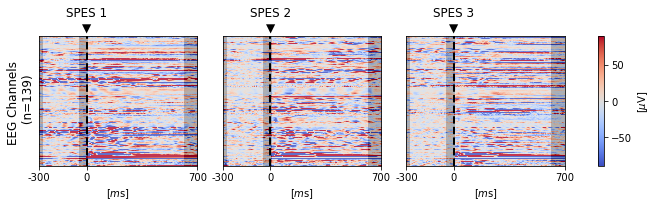

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Assume dat_wake has shape (139, 1000, 40): (Channels, Timepoints, Trials)
n_channels, trial_length, n_trials = dat_wake.shape

# Define trial structure (assuming fixed pre/post epochs across trials)
pre_stim_start = 25   # Example start index of pre-stimulus epoch
pre_stim_end = 250     # Example end index of pre-stimulus epoch
post_stim_start = 310  # Example start index of post-stimulus epoch
post_stim_end = 910    # Example end index of post-stimulus epoch
stim_time = 300        # Stimulus time (t=0) within each trial

# Select only 3 trials for visualization
trials_to_plot = [0, 1, 2]

# Set up subplots (one column per trial)
fig, axes = plt.subplots(nrows=1, ncols=len(trials_to_plot), figsize=(10, 3.), sharey=True)

for i, trial_idx in enumerate(trials_to_plot):
    ax = axes[i]

    # Extract data for the current trial
    trial_data = 1000000*dat_wake[:, :, trial_idx]  # Shape: (185, 1000)

    # Plot the trial activity
    im = ax.imshow(trial_data, aspect='auto', cmap='coolwarm', interpolation='nearest', vmin=-90, vmax=90)

    # Create a mask for non-epoch areas and overlay with low alpha
    mask = np.ones(trial_data.shape, dtype=float)
    mask[:, :pre_stim_start] = 0.2  # Dim non-epoch regions
    mask[:, pre_stim_end:post_stim_start] = 0.2  # Dim non-epoch regions
    mask[:, post_stim_end:] = 0.2
    ax.imshow(mask, aspect='auto', cmap='gray', alpha=0.2, interpolation='nearest')

    # Plot dashed line for stimulus time (t=0)
    ax.axvline(x=stim_time, color='black', linestyle='dashed', linewidth=2)
    #ax.text(stim_time, len(dat_wake)+35, f"$t'_{i+1}=0$", color='black', fontsize=12, ha='center', va='bottom')
    ax.text(stim_time, -2, f"SPES %d\n▼"%(trial_idx+1), color='black', fontsize=12, ha='center', va='bottom')
    
    # Labels and formatting
    #ax.set_title(f"Trial {trial_idx+1} \n \n", fontsize=12)
    if i == 0:
        ax.set_ylabel("EEG Channels \n (n=%d)"%len(dat_wake), fontsize=12)

    #ax.set_xticks([])
    ax.set_xticks([0,300,1000])
    ax.set_xticklabels([-300,0, 700])
    ax.set_yticks([])
    ax.set_xlabel('[$m$s]')
plt.tight_layout()


plt.colorbar(im, ax=axes.ravel().tolist(), label="[$\mu$V]")
#plt.savefig(path_fig_out+'EEG_Trials_P3_S8.png', dpi=300, transparent=True)  # Transparent PNG
plt.show()


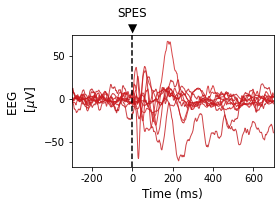

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Compute trial average (mean over trials, axis=2)
trial_avg = np.mean(dat_wake, axis=2)[::15,:]  # Shape: (185, 1000)

# Create figure
plt.figure(figsize=(4, 3))

# Use consistent colormap (coolwarm) for the plot
cmap = plt.get_cmap("Reds_r")
colors = [cmap(0.2+i / len(dat_wake)) for i in range(80)]  # Generate 185 distinct colors

# Plot each channel with matching color scheme
for i in range(trial_avg.shape[0]):
    plt.plot(1000000*trial_avg[i, :], color=colors[i], alpha=0.8, linewidth=1)

# Labels and formatting
plt.xlabel("Time (ms)", fontsize=12)
plt.ylabel("EEG \n [$\mu$V]", fontsize=12)
#plt.title("Trial-Averaged Response \n", fontsize=14)
plt.grid(False)  # Remove grid for cleaner visualization
plt.xticks([100,300,500,700,900],[-200,0, 200, 400,600])
plt.xlim(0,1000)
plt.axvline(300,linestyle='dashed',color='k')
plt.text(300, plt.ylim()[1] * 1.05, "SPES\n▼", fontsize=12, color='k', ha='center')
plt.tight_layout()
#plt.savefig(path_fig_out+'EEG_Trial_average_P1_S1.png', dpi=300, transparent=True)  # Transparent PNG
plt.show()
